In [1]:
#Import the neccessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import re
%matplotlib inline
nom=Nominatim(user_agent="my tutorial")

# Load and clean the dataset.

In [12]:
#Load the dataset, and view the first 5 rows.
df=pd.read_csv("Fema_buyouts.csv")
df.head()

,ID,Fiscal Year,Disaster Description,Residence,Owner,Structure,Address,City,State,Zip,Price Paid,Status
0,1,1989,SEVERE STORMS & FLOODING,NaN,NaN,NaN,113 MURRAY ST,FRANKFORT,KY,40601,NaN,Closed
1,2,1989,SEVERE STORMS & FLOODING,NaN,NaN,NaN,115 MURRAY ST,FRANKFORT,KY,40601,NaN,Closed
2,3,1989,SEVERE STORMS & FLOODING,NaN,NaN,NaN,117-119 ST JOHNS CT,FRANKFORT,KY,40601,NaN,Closed
3,4,1989,SEVERE STORMS & FLOODING,NaN,NaN,NaN,123 MURRAY ST,FRANKFROT,KY,40601,NaN,Closed
4,5,1989,SEVERE STORMS & FLOODING,NaN,NaN,NaN,1 VACANT LOT,FRANKFORT,KY,40601,NaN,Closed


In [13]:
#Display the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41004 entries, 0 to 41003
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    41004 non-null  int64 
 1   Fiscal Year           41004 non-null  int64 
 2   Disaster Description  36442 non-null  object
 3   Residence             18623 non-null  object
 4   Owner                 22039 non-null  object
 5   Structure             22037 non-null  object
 6   Address               40991 non-null  object
 7   City                  40994 non-null  object
 8   State                 41004 non-null  object
 9   Zip                   40983 non-null  object
 10  Price Paid            13043 non-null  object
 11  Status                40945 non-null  object
dtypes: int64(2), object(10)
memory usage: 3.8+ MB


In [14]:
#Convert the date column from int64 to a datetime 
df['Fiscal Year']= pd.to_datetime(
                          df['Fiscal Year'],
                          format='%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41004 entries, 0 to 41003
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    41004 non-null  int64         
 1   Fiscal Year           41004 non-null  datetime64[ns]
 2   Disaster Description  36442 non-null  object        
 3   Residence             18623 non-null  object        
 4   Owner                 22039 non-null  object        
 5   Structure             22037 non-null  object        
 6   Address               40991 non-null  object        
 7   City                  40994 non-null  object        
 8   State                 41004 non-null  object        
 9   Zip                   40983 non-null  object        
 10  Price Paid            13043 non-null  object        
 11  Status                40945 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 3.8+ MB


In [15]:
df.head()

,ID,Fiscal Year,Disaster Description,Residence,Owner,Structure,Address,City,State,Zip,Price Paid,Status
0,1,1989-01-01,SEVERE STORMS & FLOODING,NaN,NaN,NaN,113 MURRAY ST,FRANKFORT,KY,40601,NaN,Closed
1,2,1989-01-01,SEVERE STORMS & FLOODING,NaN,NaN,NaN,115 MURRAY ST,FRANKFORT,KY,40601,NaN,Closed
2,3,1989-01-01,SEVERE STORMS & FLOODING,NaN,NaN,NaN,117-119 ST JOHNS CT,FRANKFORT,KY,40601,NaN,Closed
3,4,1989-01-01,SEVERE STORMS & FLOODING,NaN,NaN,NaN,123 MURRAY ST,FRANKFROT,KY,40601,NaN,Closed
4,5,1989-01-01,SEVERE STORMS & FLOODING,NaN,NaN,NaN,1 VACANT LOT,FRANKFORT,KY,40601,NaN,Closed


In [16]:
#Extract the Year from the datetime column
df['Fiscal Year'] = df['Fiscal Year'].dt.year
df.head()

,ID,Fiscal Year,Disaster Description,Residence,Owner,Structure,Address,City,State,Zip,Price Paid,Status
0,1,1989,SEVERE STORMS & FLOODING,NaN,NaN,NaN,113 MURRAY ST,FRANKFORT,KY,40601,NaN,Closed
1,2,1989,SEVERE STORMS & FLOODING,NaN,NaN,NaN,115 MURRAY ST,FRANKFORT,KY,40601,NaN,Closed
2,3,1989,SEVERE STORMS & FLOODING,NaN,NaN,NaN,117-119 ST JOHNS CT,FRANKFORT,KY,40601,NaN,Closed
3,4,1989,SEVERE STORMS & FLOODING,NaN,NaN,NaN,123 MURRAY ST,FRANKFROT,KY,40601,NaN,Closed
4,5,1989,SEVERE STORMS & FLOODING,NaN,NaN,NaN,1 VACANT LOT,FRANKFORT,KY,40601,NaN,Closed


In [17]:
#Drop the columns that are irrelevant for the project
df=df.drop(columns= ['Residence', 'Owner' ])
df.head(10)

,ID,Fiscal Year,Disaster Description,Structure,Address,City,State,Zip,Price Paid,Status
0,1,1989,SEVERE STORMS & FLOODING,NaN,113 MURRAY ST,FRANKFORT,KY,40601,NaN,Closed
1,2,1989,SEVERE STORMS & FLOODING,NaN,115 MURRAY ST,FRANKFORT,KY,40601,NaN,Closed
2,3,1989,SEVERE STORMS & FLOODING,NaN,117-119 ST JOHNS CT,FRANKFORT,KY,40601,NaN,Closed
3,4,1989,SEVERE STORMS & FLOODING,NaN,123 MURRAY ST,FRANKFROT,KY,40601,NaN,Closed
4,5,1989,SEVERE STORMS & FLOODING,NaN,1 VACANT LOT,FRANKFORT,KY,40601,NaN,Closed
5,6,1989,SEVERE STORMS & FLOODING,NaN,301-303 ST JOHNS CT,FRANKFORT,KY,40601,NaN,Closed
6,7,1989,SEVERE STORMS & FLOODING,NaN,305 ST JOHNS CT,FRANKFORT,KY,40601,NaN,Closed
7,8,1989,SEVERE STORMS & FLOODING,NaN,307 ST JOHNS CT,FRANKFORT,KY,40601,NaN,Closed
8,9,1989,SEVERE STORMS & FLOODING,NaN,310 ST JOHNS CT,FRANKFORT,KY,40601,NaN,Closed
9,10,1989,SEVERE STORMS & FLOODING,NaN,318-320 ST JOHNS CT,FRANKFORT,KY,40601,NaN,Closed


In [18]:
#Reset the dataframe index 
df = df.set_index('ID')
df.head(10)

,Fiscal Year,Disaster Description,Structure,Address,City,State,Zip,Price Paid,Status
ID,,,,,,,,,
1,1989,SEVERE STORMS & FLOODING,NaN,113 MURRAY ST,FRANKFORT,KY,40601,NaN,Closed
2,1989,SEVERE STORMS & FLOODING,NaN,115 MURRAY ST,FRANKFORT,KY,40601,NaN,Closed
3,1989,SEVERE STORMS & FLOODING,NaN,117-119 ST JOHNS CT,FRANKFORT,KY,40601,NaN,Closed
4,1989,SEVERE STORMS & FLOODING,NaN,123 MURRAY ST,FRANKFROT,KY,40601,NaN,Closed
5,1989,SEVERE STORMS & FLOODING,NaN,1 VACANT LOT,FRANKFORT,KY,40601,NaN,Closed
6,1989,SEVERE STORMS & FLOODING,NaN,301-303 ST JOHNS CT,FRANKFORT,KY,40601,NaN,Closed
7,1989,SEVERE STORMS & FLOODING,NaN,305 ST JOHNS CT,FRANKFORT,KY,40601,NaN,Closed
8,1989,SEVERE STORMS & FLOODING,NaN,307 ST JOHNS CT,FRANKFORT,KY,40601,NaN,Closed
9,1989,SEVERE STORMS & FLOODING,NaN,310 ST JOHNS CT,FRANKFORT,KY,40601,NaN,Closed


In [19]:
#If you need to geocode the addresses, you can try these lines of codes


#df["New Address"]=df["Address"] + "," + " " + df["City"] + "," + " " + "NC" + "," + "USA"
#df["location lat"] = ""
#df["location long"] = ""
#df["location address"] = ""

#for i in df.index:
#    try:
#        location = nom.geocode(df["New Address"][i])
#        df.loc[i, "location lat"] = location.latitude
#        df.loc[i, "location long"] = location.longitude
#        df.loc[i, "location address"] = location.address
#    except:
#        df.loc[i, "location lat"] = ""
#        df.loc[i, "location long"] = ""
#        df.loc[i, "location address"] = ""
#df

In [8]:
#df.to_csv("Geocoded-fema.csv")

In [20]:
#Replace the nan values with unknown
df.fillna("Unknown", inplace = True)
df.head()

,Fiscal Year,Disaster Description,Structure,Address,City,State,Zip,Price Paid,Status
ID,,,,,,,,,
1,1989,SEVERE STORMS & FLOODING,Unknown,113 MURRAY ST,FRANKFORT,KY,40601,Unknown,Closed
2,1989,SEVERE STORMS & FLOODING,Unknown,115 MURRAY ST,FRANKFORT,KY,40601,Unknown,Closed
3,1989,SEVERE STORMS & FLOODING,Unknown,117-119 ST JOHNS CT,FRANKFORT,KY,40601,Unknown,Closed
4,1989,SEVERE STORMS & FLOODING,Unknown,123 MURRAY ST,FRANKFROT,KY,40601,Unknown,Closed
5,1989,SEVERE STORMS & FLOODING,Unknown,1 VACANT LOT,FRANKFORT,KY,40601,Unknown,Closed


In [21]:
# Create a dictionary for consistent disaster description
mapping = {'COASTAL STORM': 'SEVERE STORMS', 'SEVERE STORMS AND FLOODING': 'SEVERE STORMS', 
           'BLACK FOREST WILDFIRE': 'WILDFIRES', 'CO-FLOODING 4/30/99': 'FLOODING', 'DIKE FAILURE & FLASH FLOODING': 'FLOODING',
          'EXCESSIVE RAINFALL, HIGH WINDS, AND FLOODING': 'RAINFALL', 
           'EXPLOSION AT FEDERAL COURTHOUSE IN OKLAHOMA CITY': 'EXPLOSION', 'EXTENSIVE RAINFALL AND FLASH FLOODING': 'RAINFALL',
           'EXTREME WEATHER CONDITONS AND FLOODING': 'FLOODING', 'EXTREME WILDFIRE THREAT' : 'WILDFIRES', 
           'FLOODING AND MUDSLIDES': 'FLOODING', 'FLOODING AND SEVERE STORMS':'FLOODING',
           'FLOODING ASSOCIATED WITH TROPICAL DEPRESSION FRAN': 'HURRICANES',
           'FLOODING, GROUND SATURATION,SEVERE STORMS' : 'FLOODING', 'FLOODING, HEAVY WINDS':'FLOODING', 
           'FLOODING, HIGH WINDS, AND WIND DRIVEN RAIN':'FLOODING', 
           'FLOODING, LAND, MUD SLIDES, HIGH WINDS,SEVERE STORMS':'FLOODING', 'FLOODING, SEVERE STORMS' : 'FLOODING',
           'FLOODING, SEVERE STORMS AND TORNADOES': 'FLOODING', 'FLOODING, SEVERE STORMS, AND LANDSLIDES':'FLOODING', 
           'ICE JAMS & FLOODING':'FLOODING', 'ICE JAMS AND FLOODING':'FLOODING', 'KS-FLOODING  10/31/98':'FLOODING',
           'SEVERE FLOODING, HIGH WINDS,SEVERE STORMS':'FLOODING', 'NORTHRIDGE EARTHQUAKE': 'EARTHQUAKES', 
           'ICE STORM': 'SEVERE STORMS', 'HEAVY & WIND DRIVEN RAIN, HIGH WINDS,FLOODING,SLIDES':'RAINFALL',
           'HEAVY RAINS AND FLOODING': 'RAINFALL', 'HEAVY RAINS, HIGH WINDS, FLOODING, AND SLIDES': 'RAINFALL', 
           'HEAVY RAINS, SNOW MELT, FLOODING, LAND & MUD SLIDES': 'RAINFALL', 
           'HEAVY RAINS, SNOW MELT, FLOODING, LAND & MUD SLIDES':'RAINFALL', 
           'HEAVY RAINS, TORNADOS, FLOODING, HIGH WINDS': 'RAINFALL', 'HIGH PARK AND WALDO CANYON WILDFIRES': 'WILDFIRES',
           'HIGH WINDS, SEVERE STORMS AND FLOODING': 'SEVERE STORMS', 'HURRICANE ANDREW': 'HURRICANES',
           'HURRICANE BOB': 'HURRICANES', 'HURRICANE BRET': 'HURRICANES', 'HURRICANE CLAUDETTE': 'HURRICANES',
           'HURRICANE DENNIS': 'HURRICANES', 'HURRICANE ERIN': 'HURRICANES', 'HURRICANE FLOYD': 'HURRICANES', 
           'HURRICANE FLOYD MAJOR DISASTER DECLARATIONS': 'HURRICANES',
           'HURRICANE FRAN': 'HURRICANES', 'HURRICANE FRAN AND ASSOCIATED HEAVY RAINS,FLOODING HIGHWIND': 'HURRICANES', 
           'HURRICANE FRAN AND ASSOCIATED SEVERE STORM COND': 'HURRICANES',
           'HURRICANE FRANCES': 'HURRICANES', 'HURRICANE GEORGES': 'HURRICANES', 
           'HURRICANE GEORGES - 18 SEP 98': 'HURRICANES', 'HURRICANE GEORGES - TEXAS': 'HURRICANES', 
           'HURRICANE GEORGES/TS FRANCES': 'HURRICANES',
           'HURRICANE GUSTAV': 'HURRICANES', 'HURRICANE HERMINE': 'HURRICANES',
           'HURRICANE HUGO': 'HURRICANES', 'HURRICANE IKE': 'HURRICANES', 
           'HURRICANE IRENE': 'HURRICANES', 'HURRICANE ISAAC': 'HURRICANES', 
           'HURRICANE ISABEL': 'HURRICANES', 'HURRICANE IVAN': 'HURRICANES', 'HURRICANE JEANNE': 'HURRICANES',
           'HURRICANE KATRINA': 'HURRICANES', 'HURRICANE LILI': 'HURRICANES', 
           'HURRICANE MATTHEW': 'HURRICANES', 'HURRICANE OPAL': 'HURRICANES', 'HURRICANE RITA': 'HURRICANES',
           'HURRICANE OPHELIA': 'HURRICANES', 'HURRICANE SANDY': 'HURRICANES', 'HURRICANE WILMA': 'HURRICANES', 
           'NY - SEVERE WX, SEPT 7, 1998': 'SEVERE STORMS', 'REMNANTS OF TROPICAL STORM LEE': 'SEVERE STORMS', 
           'RIV-SEVERE WINTER WX 12/23/98' : 'SEVERE STORMS',
           'SEVERE FLOODING, SEVER WINTER STORMS,HEAVY RAINS HIGH WINDS': 'FLOODING',
           'SEVERE FLOODING,SEVERE WINTER STORMS, SNOWMELT, SPRING RAINS': 'FLOODING', 'SEVERE ICE STORM': 'SEVERE STORMS',
           'SEVERE ICE STORMS, FLOODING' : 'SEVERE STORMS', 'SEVERE SNOW AND ICE STORM': 'SEVERE STORMS', 
           'SEVERE SNOW STORMS, RAIN, AND STRONG WINDS': 'SEVERE STORMS', 'SEVERE STORM': 'SEVERE STORMS',
           'SEVERE STORM AND FLOODING': 'FLOODING', 'SEVERE STORM, FLOODING, AND TORNADOES': 'SEVERE STORMS', 
           'SEVERE STORMS & FLOODING': 'FLOODING', 'SEVERE STORMS AND FLOODING (TROPICAL STORM ALBERTO)': 'HURRICANES', 
           'SEVERE STORMS AND FLOODING ASSOCIATED WITH TROPICAL DEPRESSION FRANCES': 'HURRICANES',
           "SEVERE STORMS AND FLOODING ASSOCIATED WITH TROPICAL DEPRESSION IDA AND A NOR'EAST" : 'SEVERE STORMS',
           'SEVERE STORMS AND FLOODING DUE TO THE REMNANTS OF HURRICANE SANDY' : 'HURRICANES', 
           'SEVERE STORMS AND FLOODING FROM THE REMANANTS OF HURRICANE JEANNE' : 'SEVERE STORMS',
           'SEVERE STORMS AND HIGH WINDS': 'SEVERE STORMS', 'SEVERE STORMS AND INLAND AND COASTAL FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS AND STRAIGHT-LINE WINDS' : 'SEVERE STORMS',
           'SEVERE STORMS AND TORNADO' : 'SEVERE STORMS', 'SEVERE STORMS AND TORNADOES' : 'SEVERE STORMS',
           'SEVERE STORMS AND TORNADOES, AND FLOODING' : 'SEVERE STORMS', 'SEVERE STORMS AND TORNADOS' : 'SEVERE STORMS',
           'SEVERE STORMS HIGH WINDS, RAIN AND FLOODING' : 'SEVERE STORMS', 
           'SEVERE STORMS, FLOODING' : 'SEVERE STORMS', '' : 'SEVERE STORMS', 
           'SEVERE STORMS, FLOODING AND GROUND SATURATION' : 'SEVERE STORMS', 
           'SEVERE STORMS, FLOODING AND LANDSLIDES': 'SEVERE STORMS', 'SEVERE STORMS, FLOODING AND MUDSLIDES': 'SEVERE STORMS',
           'SEVERE STORMS, FLOODING AND TORNADOES':'SEVERE STORMS', 
           'SEVERE STORMS, FLOODING AND TORNADOES ASSOCIATED W TD GASTON':'SEVERE STORMS', 
           'SEVERE STORMS, FLOODING, & GROUND SATURATION':'SEVERE STORMS',
           'SEVERE STORMS, FLOODING, AND GROUND SATURATION':'SEVERE STORMS',
           'SEVERE STORMS, FLOODING, AND ICE JAMS':'SEVERE STORMS',
           'SEVERE STORMS, FLOODING, AND LANDSLIDES':'SEVERE STORMS', 'SEVERE STORMS, FLOODING, AND MUDSLIDES': 'SEVERE STORMS',
           'SEVERE STORMS, FLOODING, AND TORNADOES' : 'SEVERE STORMS', 
           'SEVERE STORMS, FLOODING, HIGH WINDS' : 'SEVERE STORMS',
           'SEVERE STORMS, FLOODING, LANDSLIDES, AND MUDSLIDES' : 'SEVERE STORMS', 
           'SEVERE STORMS, FLOODING, LANDSLIDES, MUDSLIDES' : 'SEVERE STORMS',
           'SEVERE STORMS, FLOODING, MUD AND LANDSLIDES' : 'SEVERE STORMS',
           'SEVERE STORMS, FLOODING, MUD AND ROCK SLIDES, AND TORNADOES' : 'SEVERE STORMS',
           'SEVERE STORMS, FLOODING, MUDSLIDES, AND LANDSLIDES' : 'SEVERE STORMS',
           'SEVERE STORMS, FLOODING, MUDSLIDES, AND LANSLIDES' : 'SEVERE STORMS',
           'SEVERE STORMS, FLOODING, MUDSLIDES, AND ROCKSLIDES' : 'SEVERE STORMS', 
           'SEVERE STORMS, FLOODING, MUDSLIDES, AND TORNADOES' : 'SEVERE STORMS',
           'SEVERE STORMS, FLOODING, SNOW, ICE, GROUND SATURATION, LANSLIDES, MUDSLIDES, AND TOR' : 'SEVERE STORMS',
           'SEVERE STORMS, FLOODING, STRAIGHT-LINE WINDS, AND TORNADOES' : 'SEVERE STORMS',
           'SEVERE STORMS, FLOODING, TIDAL SURGE, LANDSLIDES, AND MUDSLIDES' : 'SEVERE STORMS',
           'SEVERE STORMS, FLOODING, TORNADOES & STRAIGHT-LINE' : 'SEVERE STORMS',
           'SEVERE STORMS, FLOODING, TORNADOES, AND STRAIGHT-LINE WINDS' : 'SEVERE STORMS',
           'SEVERE STORMS, FLOODING,HIGH WINDS, ASSOC WITH HURR DANNY' : 'HURRICANES',
           'SEVERE STORMS, HAIL, FLOODING AND TORNADOES' : 'SEVERE STORMS',
           'SEVERE STORMS, HEAVY RAINS, FLOODING, MUDSLIDES' : 'SEVERE STORMS',
           'SEVERE STORMS, HIGH WIND, AND FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS, HIGH WINDS, AND HEAVY RAIN' : 'SEVERE STORMS',
           'SEVERE STORMS, HIGH WINDS, TORNADOES, AND FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS, ICE JAMS & FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS, SNOWMELT, LAND/MUD SLIDES, FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS, STRAIGHT LINE WINDS, AND FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS, STRAIGHT-LINE WINDS, AND, FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS, STRAIGHT-LINE WINDS, AND TORNADOES' : 'SEVERE STORMS',
           'SEVERE STORMS, STRAIGHT-LINE WINDS, FLOODING, LANDSLIDES, AND MUDSLIDES' : 'SEVERE STORMS',
           'SEVERE STORMS, TORNADO, AND FLOODING' : 'FLOODING',
           'SEVERE STORMS, TORNADOES & FLOODING' : 'FLOODING',
           'SEVERE STORMS, TORNADOES AND FLOODING' : 'FLOODING',
           'SEVERE STORMS, TORNADOES AND FLOODING ASSOCIATED WITH TROPICAL STORM GABRIELLE' : 'SEVERE STORMS',
           'SEVERE STORMS, TORNADOES AND HIGH WINDS' : 'SEVERE STORMS',
           'SEVERE STORMS, TORNADOES, AND FLOODING' : 'FLOODING',
           'SEVERE STORMS, TORNADOES, FLOODING' : 'FLOODING',
           'SEVERE STORMS, TORNADOES, FLOODING AND MUDSLIDES' : 'FLOODING',
           'SEVERE STORMS, TORNADOES, FLOODING, AND MUDSLIDES' : 'FLOODING',
           'SEVERE STORMS, TORNADOES, FLOODING, LANDSLIDES, AND MUDSLIDES' : 'FLOODING',
           'SEVERE STORMS, TORNADOES, FLOODING, MUDSLIDES, AND' : 'SEVERE STORMS',
           'SEVERE STORMS, TORNADOES, FLOODING, MUDSLIDES, AND LANDSLIDES' : 'SEVERE STORMS',
           'SEVERE STORMS, TORNADOES, FLOODS' : 'SEVERE STORMS',
           'SEVERE STORMS, TORNADOES, HAIL, FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS, TORNADOES, HIGH WINDS, FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS, TORNADOES, STRAIGHT LINE WINDS, AND FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS, TORNADOES, STRAIGHT-LINE WINDS AND FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS, TORNADOES, STRAIGHT-LINE WINDS, AND' : 'SEVERE STORMS',
           'SEVERE STORMS, TORNADOES, STRAIGHT-LINE WINDS, AND ASSOCIATED FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS, TORNADOES, STRAIGHT-LINE WINDS, AND FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS, TORNADOES, STRAIGHT-LINE WINDS, FLOODING, LANDSLIDES, AND MUDSLIDE' : 'SEVERE STORMS',
           'SEVERE STORMS, TORNADOES,AND FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS, WINDS, AND FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS, WINTER STORMS, TORNADOES AND FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS,FLOODING, &  ICE JAMS' : 'SEVERE STORMS',
           'SEVERE STORMS,STRAIGH LINE WINDS, TORNADOES,RAIN,AND FLOODI' : 'SEVERE STORMS',
           'SEVERE THUNDERSTORMS' : 'SEVERE STORMS',
           'SEVERE THUNDERSTORMS AND FLASH FLOODING' : 'SEVERE STORMS',
           'SEVERE THUNDERSTORMS AND FLOODING' : 'SEVERE STORMS',
           'SEVERE THUNDERSTORMS, HIGH WINDS,RAIN, FLOODING' : 'SEVERE STORMS',
           'SEVERE WEATHER, FREEZING RAIN, SLEET, SNW' : 'RAINFALL',
           'SEVERE WIND STORM ASSOCIATED WITH TROPICAL DEPRESSION IKE' : 'HURRICANES',
           'SEVERE WINTER COASTAL STORM, HIGH WINDS, FLOODING' : 'SEVERE STORMS',
           'SEVERE WINTER COLD AND FROST' : 'SEVERE STORMS',
           'SEVERE WINTER ICE AND SNOW STORMS, HEAVY RAIN, FLOODING, TORNADOES, AND MUD AND' : 'SEVERE STORMS',
           'SEVERE WINTER ICE STORM' : 'SEVERE STORMS',
           'SEVERE WINTER ICE STORM,FLASH FLOODING' : 'SEVERE STORMS',
           'SEVERE WINTER STORM' : 'SEVERE STORMS',
           'SEVERE WINTER STORM AND FLOODING' : 'SEVERE STORMS',
           'SEVERE WINTER STORM AND RECORD AND NEAR RECORD SNOW' : 'SEVERE STORMS',
           'SEVERE WINTER STORM AND RECORD AND/OR NEAR RECORD SNOW' : 'SEVERE STORMS',
           'SEVERE WINTER STORM AND RECORD SNOW' : 'SEVERE STORMS',
           'SEVERE WINTER STORM AND RECORD/NEAR RECORD SNOW' : 'SEVERE STORMS',
           'SEVERE WINTER STORM AND SNOWSTORM' : 'SEVERE STORMS',
           'SEVERE WINTER STORM, FLOODING, LANDSLIDES, AND MUDSLIDES' : 'SEVERE STORMS',
           'SEVERE WINTER STORM, FLOODING, MUDSLIDES, LANDSLIDES, AND DEBRIS FLOWS' : 'SEVERE STORMS',
           'SEVERE WINTER STORM, FREEEZING RAIN AND SLEET' : 'SEVERE STORMS',
           'SEVERE WINTER STORM, LANDSLIDES, AND MUDSLIDES' : 'SEVERE STORMS',
           'SEVERE WINTER STORM, LANDSLIDES, MUDSLIDES, AND FLOODING' : 'SEVERE STORMS',
           'SEVERE WINTER STORM, RECORD AND NEAR RECORD SNOW' : 'SEVERE STORMS',
           'SEVERE WINTER STORM, RECORD/NEAR RECORD SNOW, HEAVY RAINS, FLOODING AND LANDSLIDES' : 'SEVERE STORMS',
           'SEVERE WINTER STORM, RECORD/NEAR RECORD SNOWFALL, HEAVY RAIN,FLOODIND, AND MUDSLIDE' : 'SEVERE STORMS',
           'SEVERE WINTER STORM, SNOWSTORM, FLOODING, LANDSLIDES, AND MUDSLIDES' : 'SEVERE STORMS',
           'SEVERE WINTER STORM, TIDAL SURGES AND FLOODING' : 'SEVERE STORMS',
           'SEVERE WINTER STORMS' : 'SEVERE STORMS',
           'SEVERE WINTER STORMS AND FLOODING' : 'SEVERE STORMS',
           'SEVERE WINTER STORMS AND SNOWSTORMS' : 'SEVERE STORMS',
           'SEVERE WINTER STORMS, FLOODING LANDSLIDES, MUD FLOW' : 'SEVERE STORMS',
           'SEVERE WINTER STORMS, FLOODING, AND MUDSLIDES' : 'SEVERE STORMS',
           'SEVERE WINTER STORMS, FLOODING, AND TORNADOES' : 'SEVERE STORMS', 
           'SEVERE WINTER STORMS, FLOODING, LANDSLIDES, MUD FLOWS': 'SEVERE STORMS',
           'SEVERE WINTER STORMS, FREEZING, FLOODING': 'SEVERE STORMS',
           'SEVERE WINTER STORMS, ICE AND FLOODING': 'SEVERE STORMS',
           'SEVERE WINTER STORMS, LAND & MUDS SLIDES,FLOODING': 'SEVERE STORMS',
           'SEVERE WINTER STORMS, LAND & MUDS SLIDES,FLOODING': 'SEVERE STORMS',
           'SEVERE WINTER STORMS, STRAIGHT-LINE WINDS, FLOODING, LANDSLIDES, AND MUDSLIDES': 'SEVERE STORMS',
           'SEVERE WINTER WEATHER AND ICE STORMS': 'SEVERE STORMS',
           'SNOWSTORM': 'SEVERE STORMS',
           'TORNADO': 'SEVERE STORMS',
           'TORNADOES, FLOODING TORRENTIAL RAIN(TROP STORM ALBERTO)': 'HURRICANES',
           'TORNADOES, FLOODING, AND SEVERE STORMS': 'SEVERE STORMS',
           'TORNADOES, FLOODING, SEVERE STORMS, AND HIGH WINDS': 'SEVERE STORMS',
           'TORNADOES, SEVERE STORMS AND FLOODING': 'SEVERE STORMS',
           'TROPICAL DEPRESSION DENNIS PA': 'HURRICANES',
           'TROPICAL DEPRESSION IVAN': 'HURRICANES',
           'TROPICAL STORM ALLISON': 'HURRICANES',
           'TROPICAL STORM BONNIE AND HURRICANE CHARLEY': 'HURRICANES',
           'TROPICAL STORM CHARLEY': 'HURRICANES',
           'TROPICAL STORM DEBBY': 'HURRICANES',
           'TROPICAL STORM ERIN': 'HURRICANES',
           'TROPICAL STORM FRANCES': 'HURRICANES',
           'TROPICAL STORM HANNA': 'HURRICANES',
           'TROPICAL STORM HENRI': 'HURRICANES',
           'TROPICAL STORM IRENE': 'HURRICANES',
           'TROPICAL STORM ISIDORE': 'HURRICANES',
           'TROPICAL STORM LEE': 'HURRICANES',
           'TX-FLOODING 10/18/98': 'FLOODING',
           'TX-TROPICAL STORM ALLISON-06-06-2001': 'HURRICANES',
           'VALLEY FIRE AND BUTTE FIRE': 'WILDFIRES',
           'WA LANDSLIDE 3/6/98': 'SEVERE STORMS',
           'WY - WINTER STORM  10/5/98': 'SEVERE STORMS',
           'EARTHQUAKE' : 'EARTHQUAKES',
           'HIGH WINDS, SEVERE  STORMS AND FLOODING': 'SEVERE STORMS',
           'TROPICAL STORM FAY' : 'HURRICANES',
           'SEVERE STORMS & HAIL' : 'SEVERE STORMS',
           'SEVERE STORMS AND  FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS AND FLASH FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS AND FLOODING ASSOC WITH TROPICAL STORM FRAN' : 'HURRICANES',
           'SEVERE WINTER STORMS, LAND AND MUDSLIDES, FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS, STRAIGHT-LINE WINDS, AND FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS, STRAIGHT-LINE WINDS AND FLOODING' : 'SEVERE STORMS',
           'SEVERE STORMS, FLOODING, SNOW MELT AND ICE JAMS' : 'SEVERE STORMS',
           'HEAVY RAINS, TORNADOES, FLOODING, HAIL, HIGH WINDS': 'RAINFALL'
           
           
           


          }

# Replace values in column 'B' using the dictionary
df['Disaster Description'] = df['Disaster Description'].replace(mapping)
df.head()

,Fiscal Year,Disaster Description,Structure,Address,City,State,Zip,Price Paid,Status
ID,,,,,,,,,
1,1989,FLOODING,Unknown,113 MURRAY ST,FRANKFORT,KY,40601,Unknown,Closed
2,1989,FLOODING,Unknown,115 MURRAY ST,FRANKFORT,KY,40601,Unknown,Closed
3,1989,FLOODING,Unknown,117-119 ST JOHNS CT,FRANKFORT,KY,40601,Unknown,Closed
4,1989,FLOODING,Unknown,123 MURRAY ST,FRANKFROT,KY,40601,Unknown,Closed
5,1989,FLOODING,Unknown,1 VACANT LOT,FRANKFORT,KY,40601,Unknown,Closed


In [22]:
#Use the drop_duplicates to assess the disaster counts
df['Disaster Description'].drop_duplicates()

ID
1             FLOODING
19          HURRICANES
315      SEVERE STORMS
8739       EARTHQUAKES
9814          RAINFALL
10928        EXPLOSION
14965          Unknown
25026        WILDFIRES
Name: Disaster Description, dtype: object

# What are the buyouts per state between 1989-2019?

In [23]:
#Determine the number of disasters buyouts per state
State_disaster = df.pivot_table(index =['State'],
                       values =['Disaster Description'],
                       aggfunc ='count').sort_values(by=['Disaster Description'], ascending=False)
print(State_disaster)

       Disaster Description
State                      
MO                     5165
TX                     3706
IL                     3058
NC                     2825
IA                     2720
NJ                     1848
GA                     1651
OH                     1641
PA                     1501
KS                     1310
IN                     1250
AL                     1250
WV                     1248
ND                     1191
KY                     1148
MN                     1095
TN                     1020
LA                      762
NY                      711
WI                      704
WA                      601
MS                      583
FL                      542
NE                      463
VA                      461
OK                      431
CA                      270
MI                      235
OR                      177
VT                      173
SD                      161
MD                      161
AZ                      159
CO                  

In [24]:
#Reset the index, and rename the Disaster Description to Buyout Counts
State_disaster.reset_index(level=0, inplace=True)
State_disaster.rename(columns = {'Disaster Description':'Buyout Counts'}, inplace = True)
State_disaster

,State,Buyout Counts
0,MO,5165
1,TX,3706
2,IL,3058
3,NC,2825
4,IA,2720
5,NJ,1848
6,GA,1651
7,OH,1641
8,PA,1501
9,KS,1310


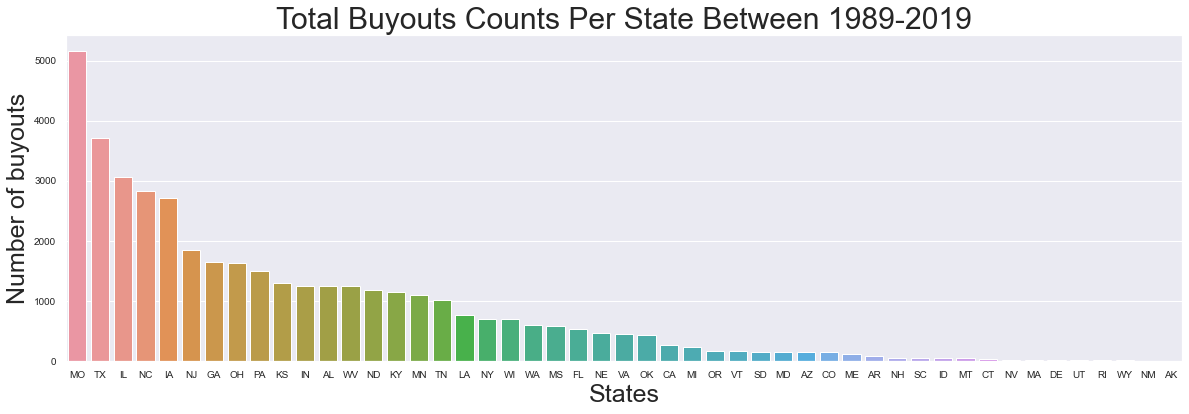

In [116]:
#Plot the buyouts per state dataset on a bar chart
sns.set_theme()
fig, ax = plt.subplots(figsize=(20, 6))
ax = sns.barplot(x="State", y="Buyout Counts", data=State_disaster)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Total Buyouts Counts Per State Between 1989-2019", fontsize=30)
plt.ylabel("Number of buyouts", fontsize=25)
plt.xlabel("States", fontsize=25)

plt.show()

# What are the buyout trends between 1989-2019?

In [65]:
#Determine the timeseries of buyouts from 1989-2019
Timeseries=df.groupby('Fiscal Year')['Disaster Description'].count()
Timeseries = pd.DataFrame(Timeseries)
Timeseries.reset_index(level=0, inplace=True)
Timeseries

,Fiscal Year,Disaster Description
0,1989,25
1,1990,182
2,1991,120
3,1992,30
4,1993,8180
5,1994,1830
6,1995,1045
7,1996,3249
8,1997,3180
9,1998,1201


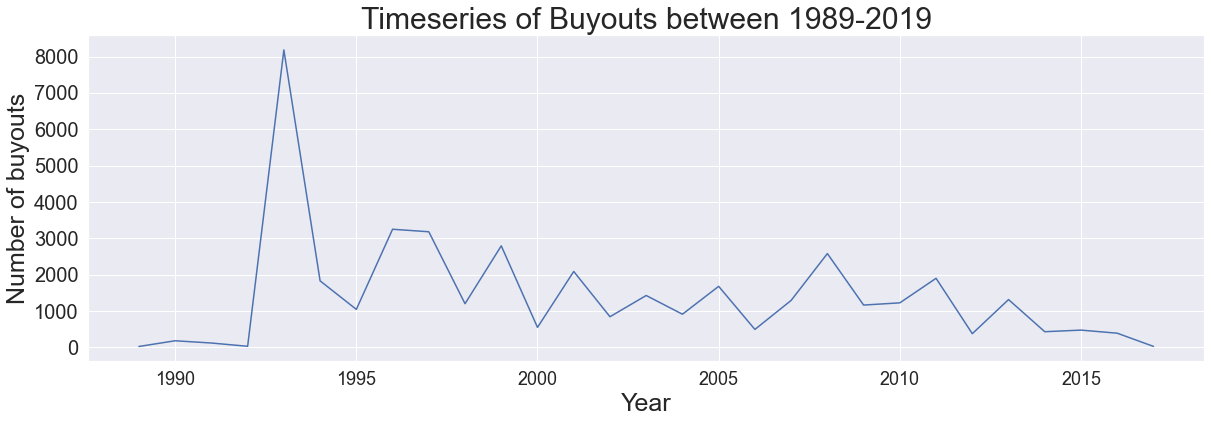

In [115]:
#Plot the data on a line chart
sns.set_theme()
fig, ax = plt.subplots(figsize=(20, 6))
ax = sns.lineplot(x='Fiscal Year', y="Disaster Description", data=Timeseries)
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.title("Timeseries of Buyouts between 1989-2019", fontsize=30)
plt.ylabel("Number of buyouts", fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.show()
plt.show()

# What type of structures were bought out between 1989-2019?

In [32]:
#Determine the structure types that were bought out
Structure_type = df.pivot_table(index =['Structure'],
                       values =['Disaster Description'],
                       aggfunc ='count').sort_values(by=['Disaster Description'], ascending=False)
Structure_type

,Disaster Description
Structure,
Unknown,18967
Single Family,18018
Manufactured Home,1399
Vacant Land,1123
2-4 Family,598
Multi-Family Dwelling - 5 or More Units,310
Non-residential - Private,299
Other (Specify in Comments),173
Non-residential - Public,117


In [33]:
#Reset index of the dataframe
Structure_type.reset_index(level=0, inplace=True)
Structure_type

,Structure,Disaster Description
0,Unknown,18967
1,Single Family,18018
2,Manufactured Home,1399
3,Vacant Land,1123
4,2-4 Family,598
5,Multi-Family Dwelling - 5 or More Units,310
6,Non-residential - Private,299
7,Other (Specify in Comments),173
8,Non-residential - Public,117


In [41]:
#Replace the () in the structure column
Structure_type['Structure']= Structure_type['Structure'].str.replace(r"\(.*\)", 'structures')
Structure_type['Structure']= Structure_type['Structure'].str.replace(r"Multi-Family Dwelling - 5 or More Units", '5 or more Family')
Structure_type

C:\Users\nelso\AppData\Local\Temp\ipykernel_29588\2482926165.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Structure_type['Structure']= Structure_type['Structure'].str.replace(r"\(.*\)", 'structures')


,Structure,Disaster Description,Percentage
0,Unknown,18967,46.26
1,Single Family,18018,43.94
2,Manufactured Home,1399,3.41
3,Vacant Land,1123,2.74
4,2-4 Family,598,1.46
5,5 or more Family,310,0.76
6,Non-residential - Private,299,0.73
7,Other structures,173,0.42
8,Non-residential - Public,117,0.29


In [44]:
#Determine the percentage of buyout structures
Structure_type['Percentage']= ((Structure_type['Disaster Description']/Structure_type['Disaster Description'].sum())*100).round(2)
Structure_type

,Structure,Disaster Description,Percentage
0,Unknown,18967,46.26
1,Single Family,18018,43.94
2,Manufactured Home,1399,3.41
3,Vacant Land,1123,2.74
4,2-4 Family,598,1.46
5,5 or more Family,310,0.76
6,Non-residential - Private,299,0.73
7,Other structures,173,0.42
8,Non-residential - Public,117,0.29


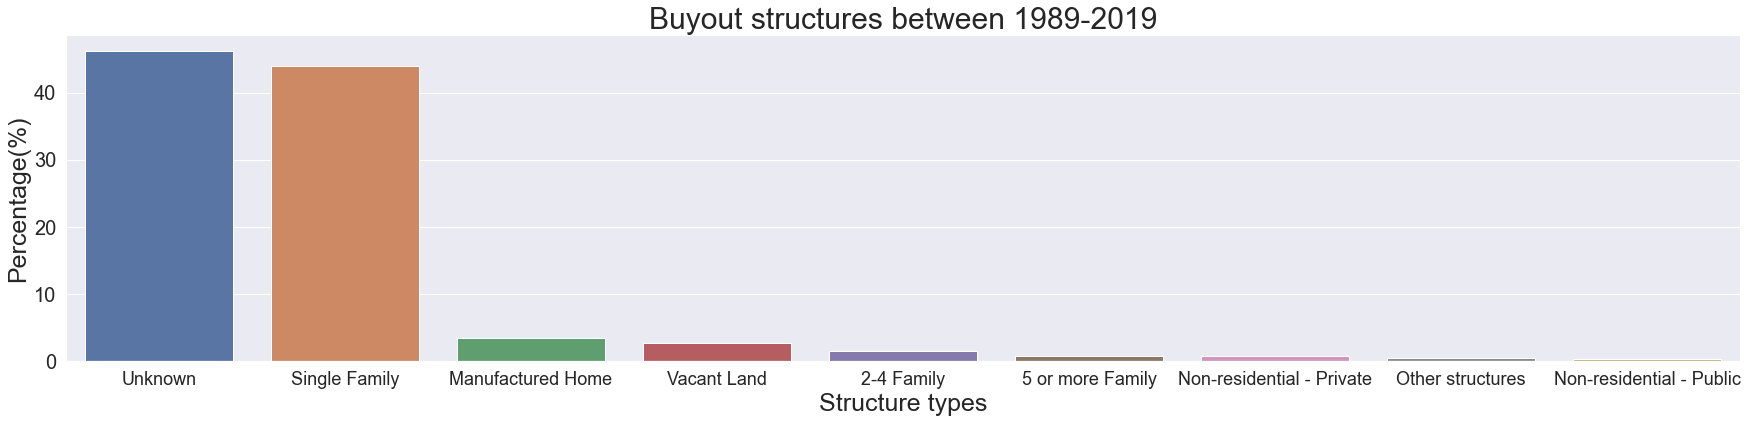

In [114]:
#Plot the structures on a bar plot
sns.set_theme()
fig, ax = plt.subplots(figsize=(30, 6))
ax = sns.barplot(x="Structure", y="Percentage", data=Structure_type)
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.title("Buyout structures between 1989-2019", fontsize=30)
plt.ylabel("Percentage(%)", fontsize=25)
plt.xlabel("Structure types", fontsize=25)
plt.show()



# What type of disaster have generated the most buyouts? 

In [84]:
#Create a dataframe to generate the disaster type
Disaster_type = df.groupby('Disaster Description')['Disaster Description'].count()
Disaster_type= pd.DataFrame(Disaster_type)
Disaster_type.rename(columns = {'Disaster Description':'Values'}, inplace = True)
Disaster_type=Disaster_type.sort_values(by=['Values'], ascending=False)
Disaster_type.reset_index(level=0, inplace=True)
Disaster_type


,Disaster Description,Values
0,SEVERE STORMS,13699
1,FLOODING,12842
2,HURRICANES,9518
3,Unknown,4562
4,RAINFALL,273
5,EXPLOSION,40
6,WILDFIRES,36
7,EARTHQUAKES,34


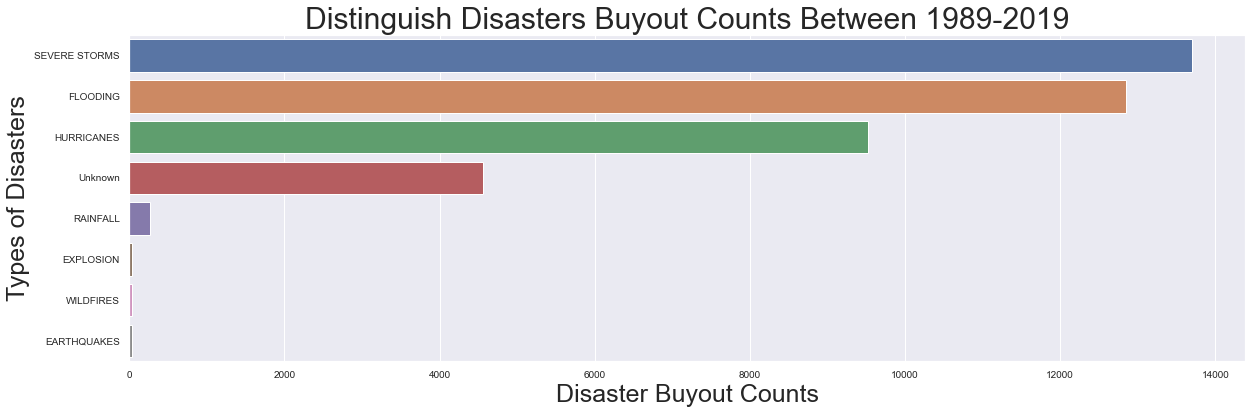

In [113]:
#Plot the buyouts per state dataset on a bar chart
sns.set_theme()
fig, ax = plt.subplots(figsize=(20, 6))
ax = sns.barplot(x="Values", y="Disaster Description", data=Disaster_type)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Distinguish Disasters Buyout Counts Between 1989-2019", fontsize=30)
plt.xlabel("Disaster Buyout Counts", fontsize=25)
plt.ylabel("Types of Disasters", fontsize=25)

plt.show()


In [86]:
df


,Fiscal Year,Disaster Description,Structure,Address,City,State,Zip,Price Paid,Status
ID,,,,,,,,,
1,1989,FLOODING,Unknown,113 MURRAY ST,FRANKFORT,KY,40601,Unknown,Closed
2,1989,FLOODING,Unknown,115 MURRAY ST,FRANKFORT,KY,40601,Unknown,Closed
3,1989,FLOODING,Unknown,117-119 ST JOHNS CT,FRANKFORT,KY,40601,Unknown,Closed
4,1989,FLOODING,Unknown,123 MURRAY ST,FRANKFROT,KY,40601,Unknown,Closed
5,1989,FLOODING,Unknown,1 VACANT LOT,FRANKFORT,KY,40601,Unknown,Closed
...,...,...,...,...,...,...,...,...,...
43978,2017,SEVERE STORMS,Single Family,33 WALNUT ST,BLOOMSBURG,PA,17815,Unknown,Approved
43979,2017,SEVERE STORMS,Single Family,5 RED MILL RD,BLOOMSBURG,PA,17815,Unknown,Approved
43980,2017,SEVERE STORMS,Single Family,62 WALNUT ST,BLOOMSBURG,PA,17815,Unknown,Approved


In [96]:
Disaster_Timeseries = df.groupby(['Fiscal Year', 'Disaster Description'])['Disaster Description'].count()
Disaster_Timeseries = pd.DataFrame(Disaster_Timeseries)
Disaster_Timeseries.rename(columns = {'Disaster Description':'Values'}, inplace = True)
Disaster_Timeseries.reset_index( inplace=True)
#Disaster_Timeseries=Disaster_type.sort_values(by=['Fiscal Year'], ascending=False)
Disaster_Timeseries

,Fiscal Year,Disaster Description,Values
0,1989,FLOODING,20
1,1989,HURRICANES,5
2,1990,FLOODING,182
3,1991,FLOODING,40
4,1991,HURRICANES,2
...,...,...,...
107,2016,HURRICANES,2
108,2016,SEVERE STORMS,57
109,2016,Unknown,331
110,2017,HURRICANES,1


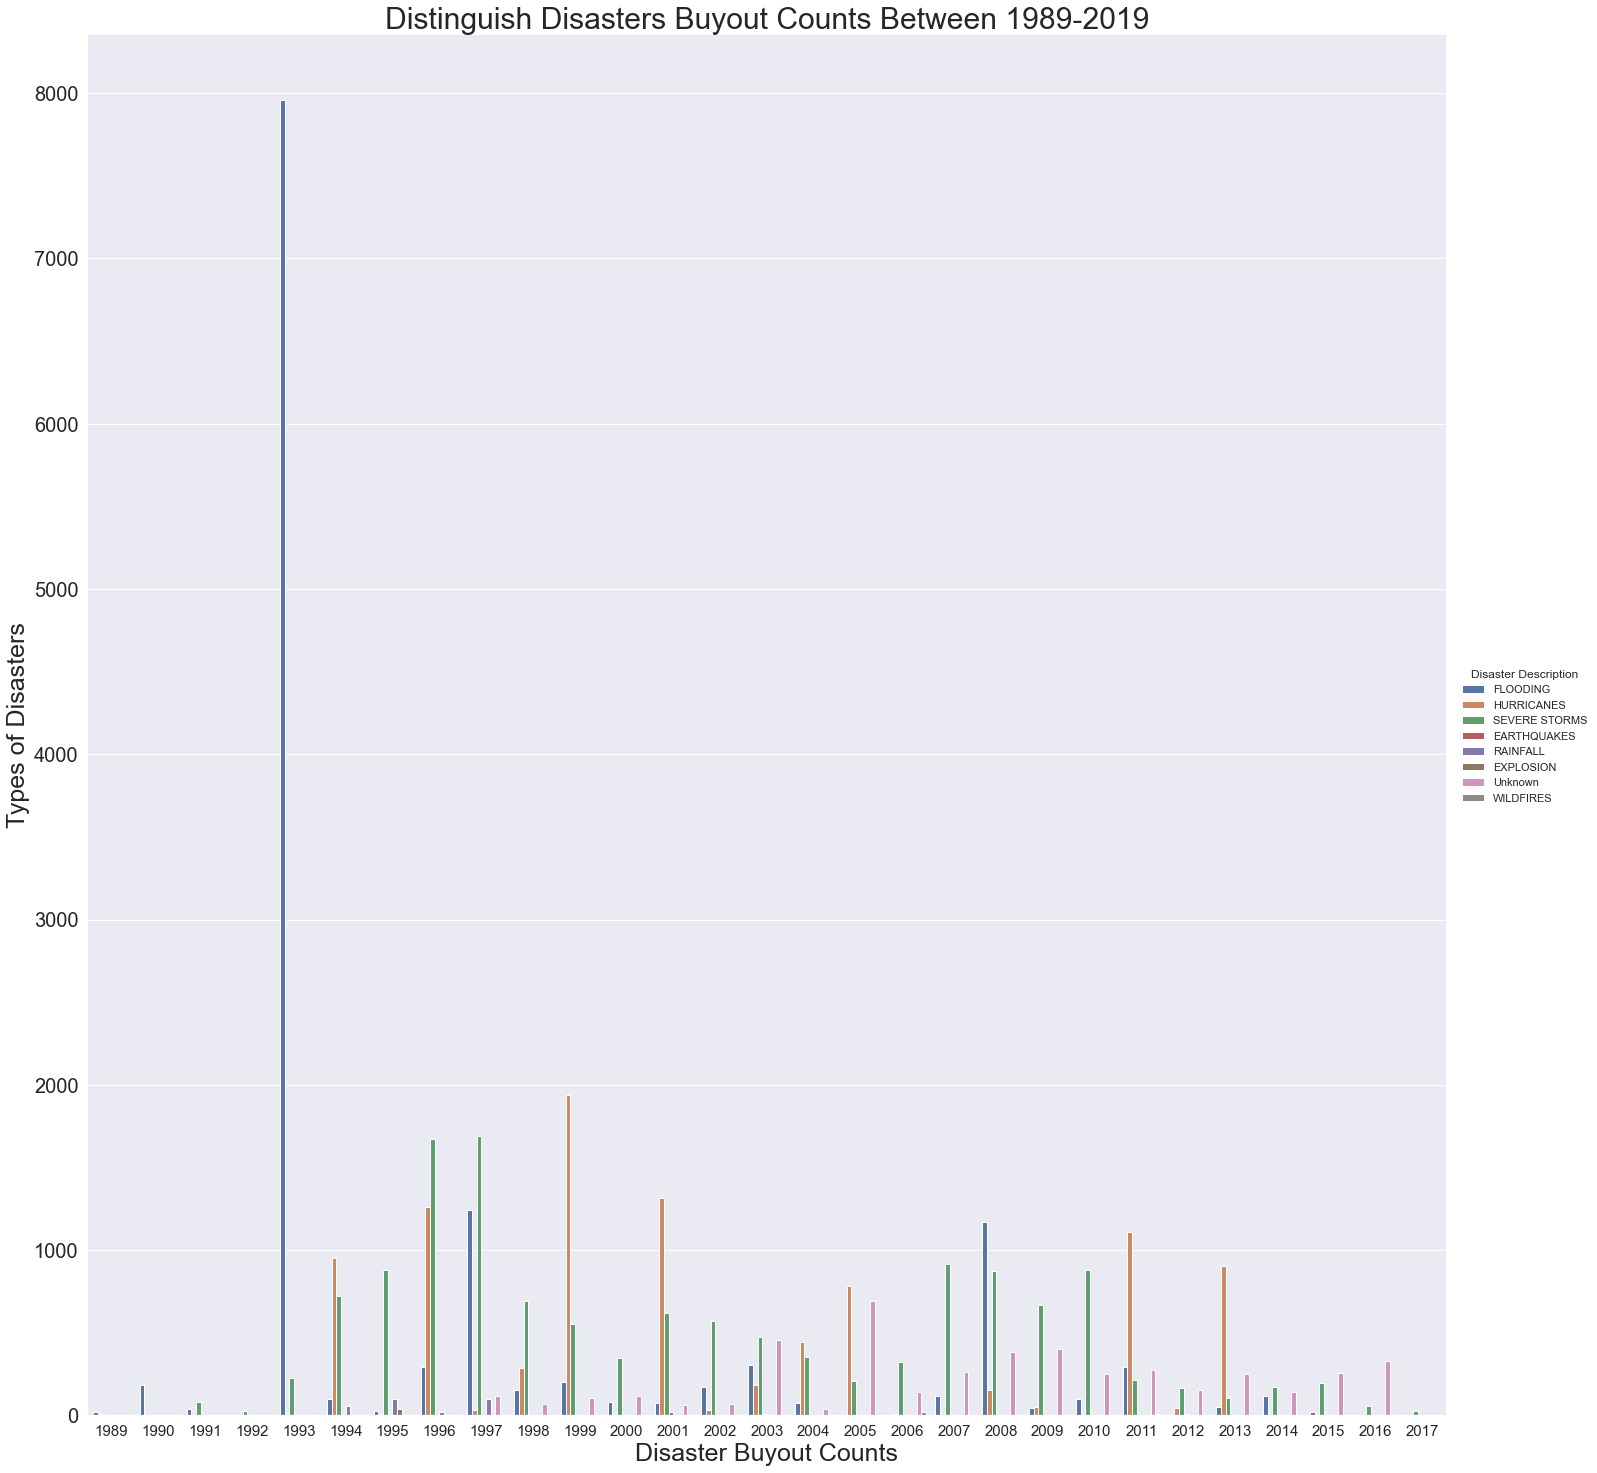

In [117]:

# Draw a nested barplot by species and sex
#fig, ax = plt.subplots(figsize=(20, 6))
sns.set_theme()
ax = sns.catplot(
    data=Disaster_Timeseries, kind="bar",
    x="Fiscal Year", y="Values", hue="Disaster Description", height=20, legend_out= bool
)
ax.despine(left=True)




plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.title("Distinguish Disasters Buyout Counts Between 1989-2019", fontsize=30)
plt.xlabel("Disaster Buyout Counts", fontsize=25)
plt.ylabel("Types of Disasters", fontsize=25)


plt.show()

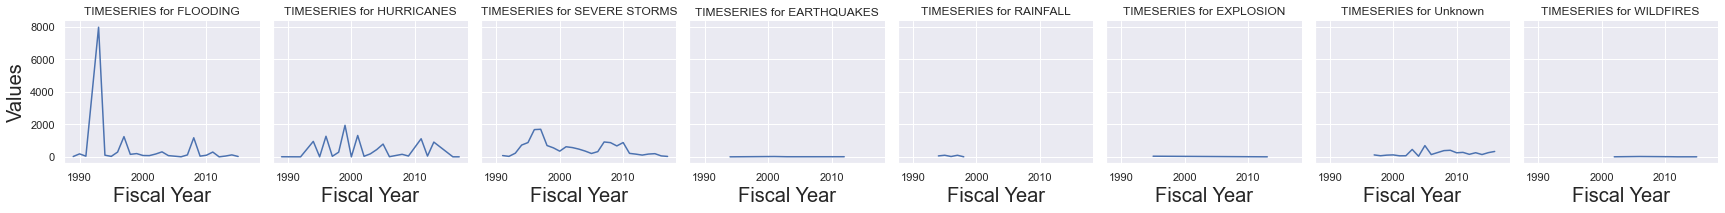

In [150]:

g = sns.FacetGrid(Disaster_Timeseries, col="Disaster Description" )
g.map(sns.lineplot, "Fiscal Year", "Values" )

g.set_xlabels("Fiscal Year", fontsize=20)
g.set_ylabels("Values", fontsize=20)
g.set_titles("TIMESERIES for {col_name}", fontsize=20)


plt.show()
